In [ ]:
# it is required to have the Cat and Dog dataset extracted to run the the following code cells............
# without the dataset the code does not work .......
# only a part of the code is presented here........

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/35
52/90 [================>.............] - ETA: 1:04 - loss: 1.6584 - acc: 0.5080

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

90/90 [==============================] - 161s 2s/step - loss: 1.3995 - acc: 0.5145 - val_loss: 0.6879 - val_acc: 0.5552
Epoch 2/35
90/90 [==============================] - 161s 2s/step - loss: 0.6899 - acc: 0.5593 - val_loss: 0.6854 - val_acc: 0.5568
Epoch 3/35
90/90 [==============================] - 163s 2s/step - loss: 0.6741 - acc: 0.5942 - val_loss: 0.6500 - val_acc: 0.6324
Epoch 4/35
90/90 [==============================] - 161s 2s/step - loss: 0.6608 - acc: 0.6179 - val_loss: 0.6213 - val_acc: 0.6772
Epoch 5/35
90/90 [==============================] - 160s 2s/step - loss: 0.6477 - acc: 0.6367 - val_loss: 0.6086 - val_acc: 0.6748
Epoch 6/35
90/90 [==============================] - 159s 2s/step - loss: 0.6361 - acc: 0.6476 - val_loss: 0.6324 - val_acc: 0.6488
Epoch 7/35
90/90 [==============================] - 163s 2s/step - loss: 0.6303 - acc: 0.6560 - val_loss: 0.5865 - val_acc: 0.7096
Epoch 8/35
90/90 [==============================] - 162s 2s/step - loss: 0.6192 - acc: 0.6643 

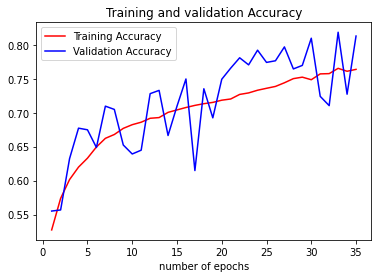

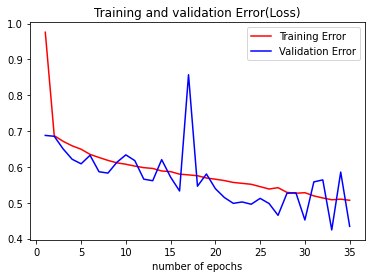

In [25]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt



# adding an early stop to reduce overfitting
callback_end = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),  # use this dropout class to reduce overfittig
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


Training_Path = "/tmp/data/training/"
Training_imgdatagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                        )

Training_gen = Training_imgdatagen.flow_from_directory(
                            Training_Path,
                            batch_size=250,
                            class_mode='binary',
                            target_size=(150, 150)  # All images are resized to 150x150
                                                   )

Teating_Path = "/tmp/data/testing/"
Validation_imgdatagen = ImageDataGenerator(rescale=1./255)

Validation_gen = Validation_imgdatagen.flow_from_directory(
                                        Teating_Path,
                                        batch_size=250,
                                        class_mode='binary',
                                        target_size=(150, 150)  # All images are resized to 150x150
                                                              )


history = model.fit(Training_gen, epochs=35, steps_per_epoch=90,
                    validation_data=Validation_gen, validation_steps=10, callbacks=[callback_end])


# Obtain the accuracy and error result values as a list to be used in graphs


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, (len(acc)+1))  # Get number of epochs


# Plotting training and validation accuracy vs epochs graph

plt.figure(1)
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.title('Training and validation Accuracy')
plt.xlabel('number of epochs')


# Plotting training and validation loss (error) vs epochs graph

plt.figure(2)
plt.plot(epochs, loss, 'r', label="Training Error")
plt.plot(epochs, val_loss, 'b', label="Validation Error")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.title('Training and validation Error(Loss)')
plt.xlabel('number of epochs')

plt.show()


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/20
113/450 [======>.......................] - ETA: 1:58 - loss: 0.7755 - acc: 0.5177

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

450/450 [==============================] - 165s 365ms/step - loss: 0.7002 - acc: 0.5718 - val_loss: 0.5720 - val_acc: 0.6988
Epoch 2/20
450/450 [==============================] - 163s 363ms/step - loss: 0.5998 - acc: 0.6724 - val_loss: 0.5130 - val_acc: 0.7400
Epoch 3/20
450/450 [==============================] - 163s 362ms/step - loss: 0.5651 - acc: 0.7088 - val_loss: 0.4834 - val_acc: 0.7688
Epoch 4/20
450/450 [==============================] - 164s 365ms/step - loss: 0.5450 - acc: 0.7241 - val_loss: 0.5041 - val_acc: 0.7656
Epoch 5/20
450/450 [==============================] - 162s 360ms/step - loss: 0.5320 - acc: 0.7369 - val_loss: 0.4858 - val_acc: 0.7612
Epoch 6/20
450/450 [==============================] - 162s 360ms/step - loss: 0.5202 - acc: 0.7415 - val_loss: 0.4454 - val_acc: 0.7812
Epoch 7/20
450/450 [==============================] - 162s 361ms/step - loss: 0.5021 - acc: 0.7612 - val_loss: 0.4219 - val_acc: 0.8072
Epoch 8/20
450/450 [==============================] - 162s 

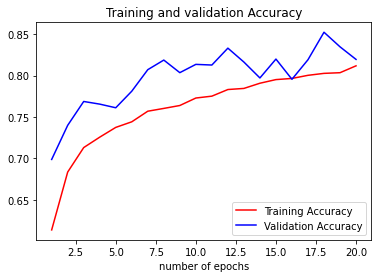

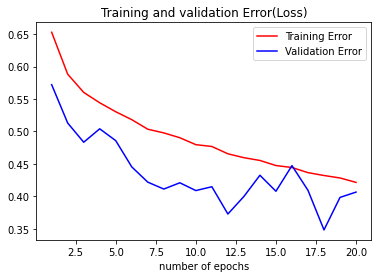

In [32]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt



# adding an early stop to reduce overfitting
callback_end = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),  # use this dropout class to reduce overfittig
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


Training_Path = "/tmp/data/training/"
Training_imgdatagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                        )

Training_gen = Training_imgdatagen.flow_from_directory(
                            Training_Path,
                            batch_size=50,
                            class_mode='binary',
                            target_size=(150, 150)  # All images are resized to 150x150
                                                   )

Teating_Path = "/tmp/data/testing/"
Validation_imgdatagen = ImageDataGenerator(rescale=1./255)

Validation_gen = Validation_imgdatagen.flow_from_directory(
                                        Teating_Path,
                                        batch_size=50,
                                        class_mode='binary',
                                        target_size=(150, 150)  # All images are resized to 150x150
                                                              )


history = model.fit(Training_gen, epochs=20, steps_per_epoch=450,
                    validation_data=Validation_gen, validation_steps=50, callbacks=[callback_end])


# Obtain the accuracy and error result values as a list to be used in graphs


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, (len(acc)+1))  # Get number of epochs


# Plotting training and validation accuracy vs epochs graph

plt.figure(1)
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.title('Training and validation Accuracy')
plt.xlabel('number of epochs')


# Plotting training and validation loss (error) vs epochs graph

plt.figure(2)
plt.plot(epochs, loss, 'r', label="Training Error")
plt.plot(epochs, val_loss, 'b', label="Validation Error")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.title('Training and validation Error(Loss)')
plt.xlabel('number of epochs')

plt.show()


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/20
171/450 [==========>...................] - ETA: 1:37 - loss: 0.9484 - acc: 0.5265

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

450/450 [==============================] - 168s 372ms/step - loss: 0.8041 - acc: 0.5582 - val_loss: 0.5684 - val_acc: 0.7184
Epoch 2/20
450/450 [==============================] - 165s 366ms/step - loss: 0.6112 - acc: 0.6617 - val_loss: 0.5311 - val_acc: 0.7572
Epoch 3/20
450/450 [==============================] - 164s 364ms/step - loss: 0.5708 - acc: 0.7044 - val_loss: 0.5286 - val_acc: 0.7384
Epoch 4/20
450/450 [==============================] - 166s 370ms/step - loss: 0.5475 - acc: 0.7207 - val_loss: 0.4956 - val_acc: 0.7668
Epoch 5/20
450/450 [==============================] - 166s 368ms/step - loss: 0.5253 - acc: 0.7376 - val_loss: 0.4345 - val_acc: 0.8008
Epoch 6/20
450/450 [==============================] - 164s 364ms/step - loss: 0.5142 - acc: 0.7478 - val_loss: 0.5140 - val_acc: 0.7628
Epoch 7/20
450/450 [==============================] - 164s 364ms/step - loss: 0.5056 - acc: 0.7541 - val_loss: 0.4790 - val_acc: 0.7716
Epoch 8/20
450/450 [==============================] - 164s 

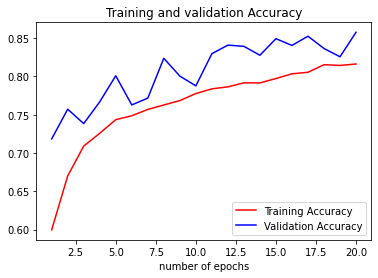

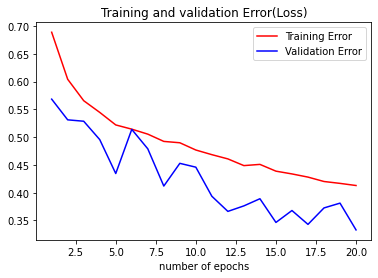

In [33]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt



# adding an early stop to reduce overfitting
callback_end = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),  # use this dropout class to reduce overfittig
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


Training_Path = "/tmp/data/training/"
Training_imgdatagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                        )

Training_gen = Training_imgdatagen.flow_from_directory(
                            Training_Path,
                            batch_size=50,
                            class_mode='binary',
                            target_size=(150, 150)  # All images are resized to 150x150
                                                   )

Teating_Path = "/tmp/data/testing/"
Validation_imgdatagen = ImageDataGenerator(rescale=1./255)

Validation_gen = Validation_imgdatagen.flow_from_directory(
                                        Teating_Path,
                                        batch_size=50,
                                        class_mode='binary',
                                        target_size=(150, 150)  # All images are resized to 150x150
                                                              )


history = model.fit(Training_gen, epochs=20, steps_per_epoch=450,
                    validation_data=Validation_gen, validation_steps=50, callbacks=[callback_end])


# Obtain the accuracy and error result values as a list to be used in graphs


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, (len(acc)+1))  # Get number of epochs


# Plotting training and validation accuracy vs epochs graph

plt.figure(1)
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.title('Training and validation Accuracy')
plt.xlabel('number of epochs')


# Plotting training and validation loss (error) vs epochs graph

plt.figure(2)
plt.plot(epochs, loss, 'r', label="Training Error")
plt.plot(epochs, val_loss, 'b', label="Validation Error")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.title('Training and validation Error(Loss)')
plt.xlabel('number of epochs')

plt.show()


In [ ]:
### adding more deep NN sections ...
import tensorflow as tf

def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 14
    out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    return out